# Hierarchial Clustering of 2016 Election Data 

In [1]:
#importing external modules 
import numpy as np

#import text file and split on the states names and percentages 
states = [x.split(' ')[0] for x in open('states.txt').readlines()]
X = np.array([x.split()[1:] for x in open('states.txt').readlines()])

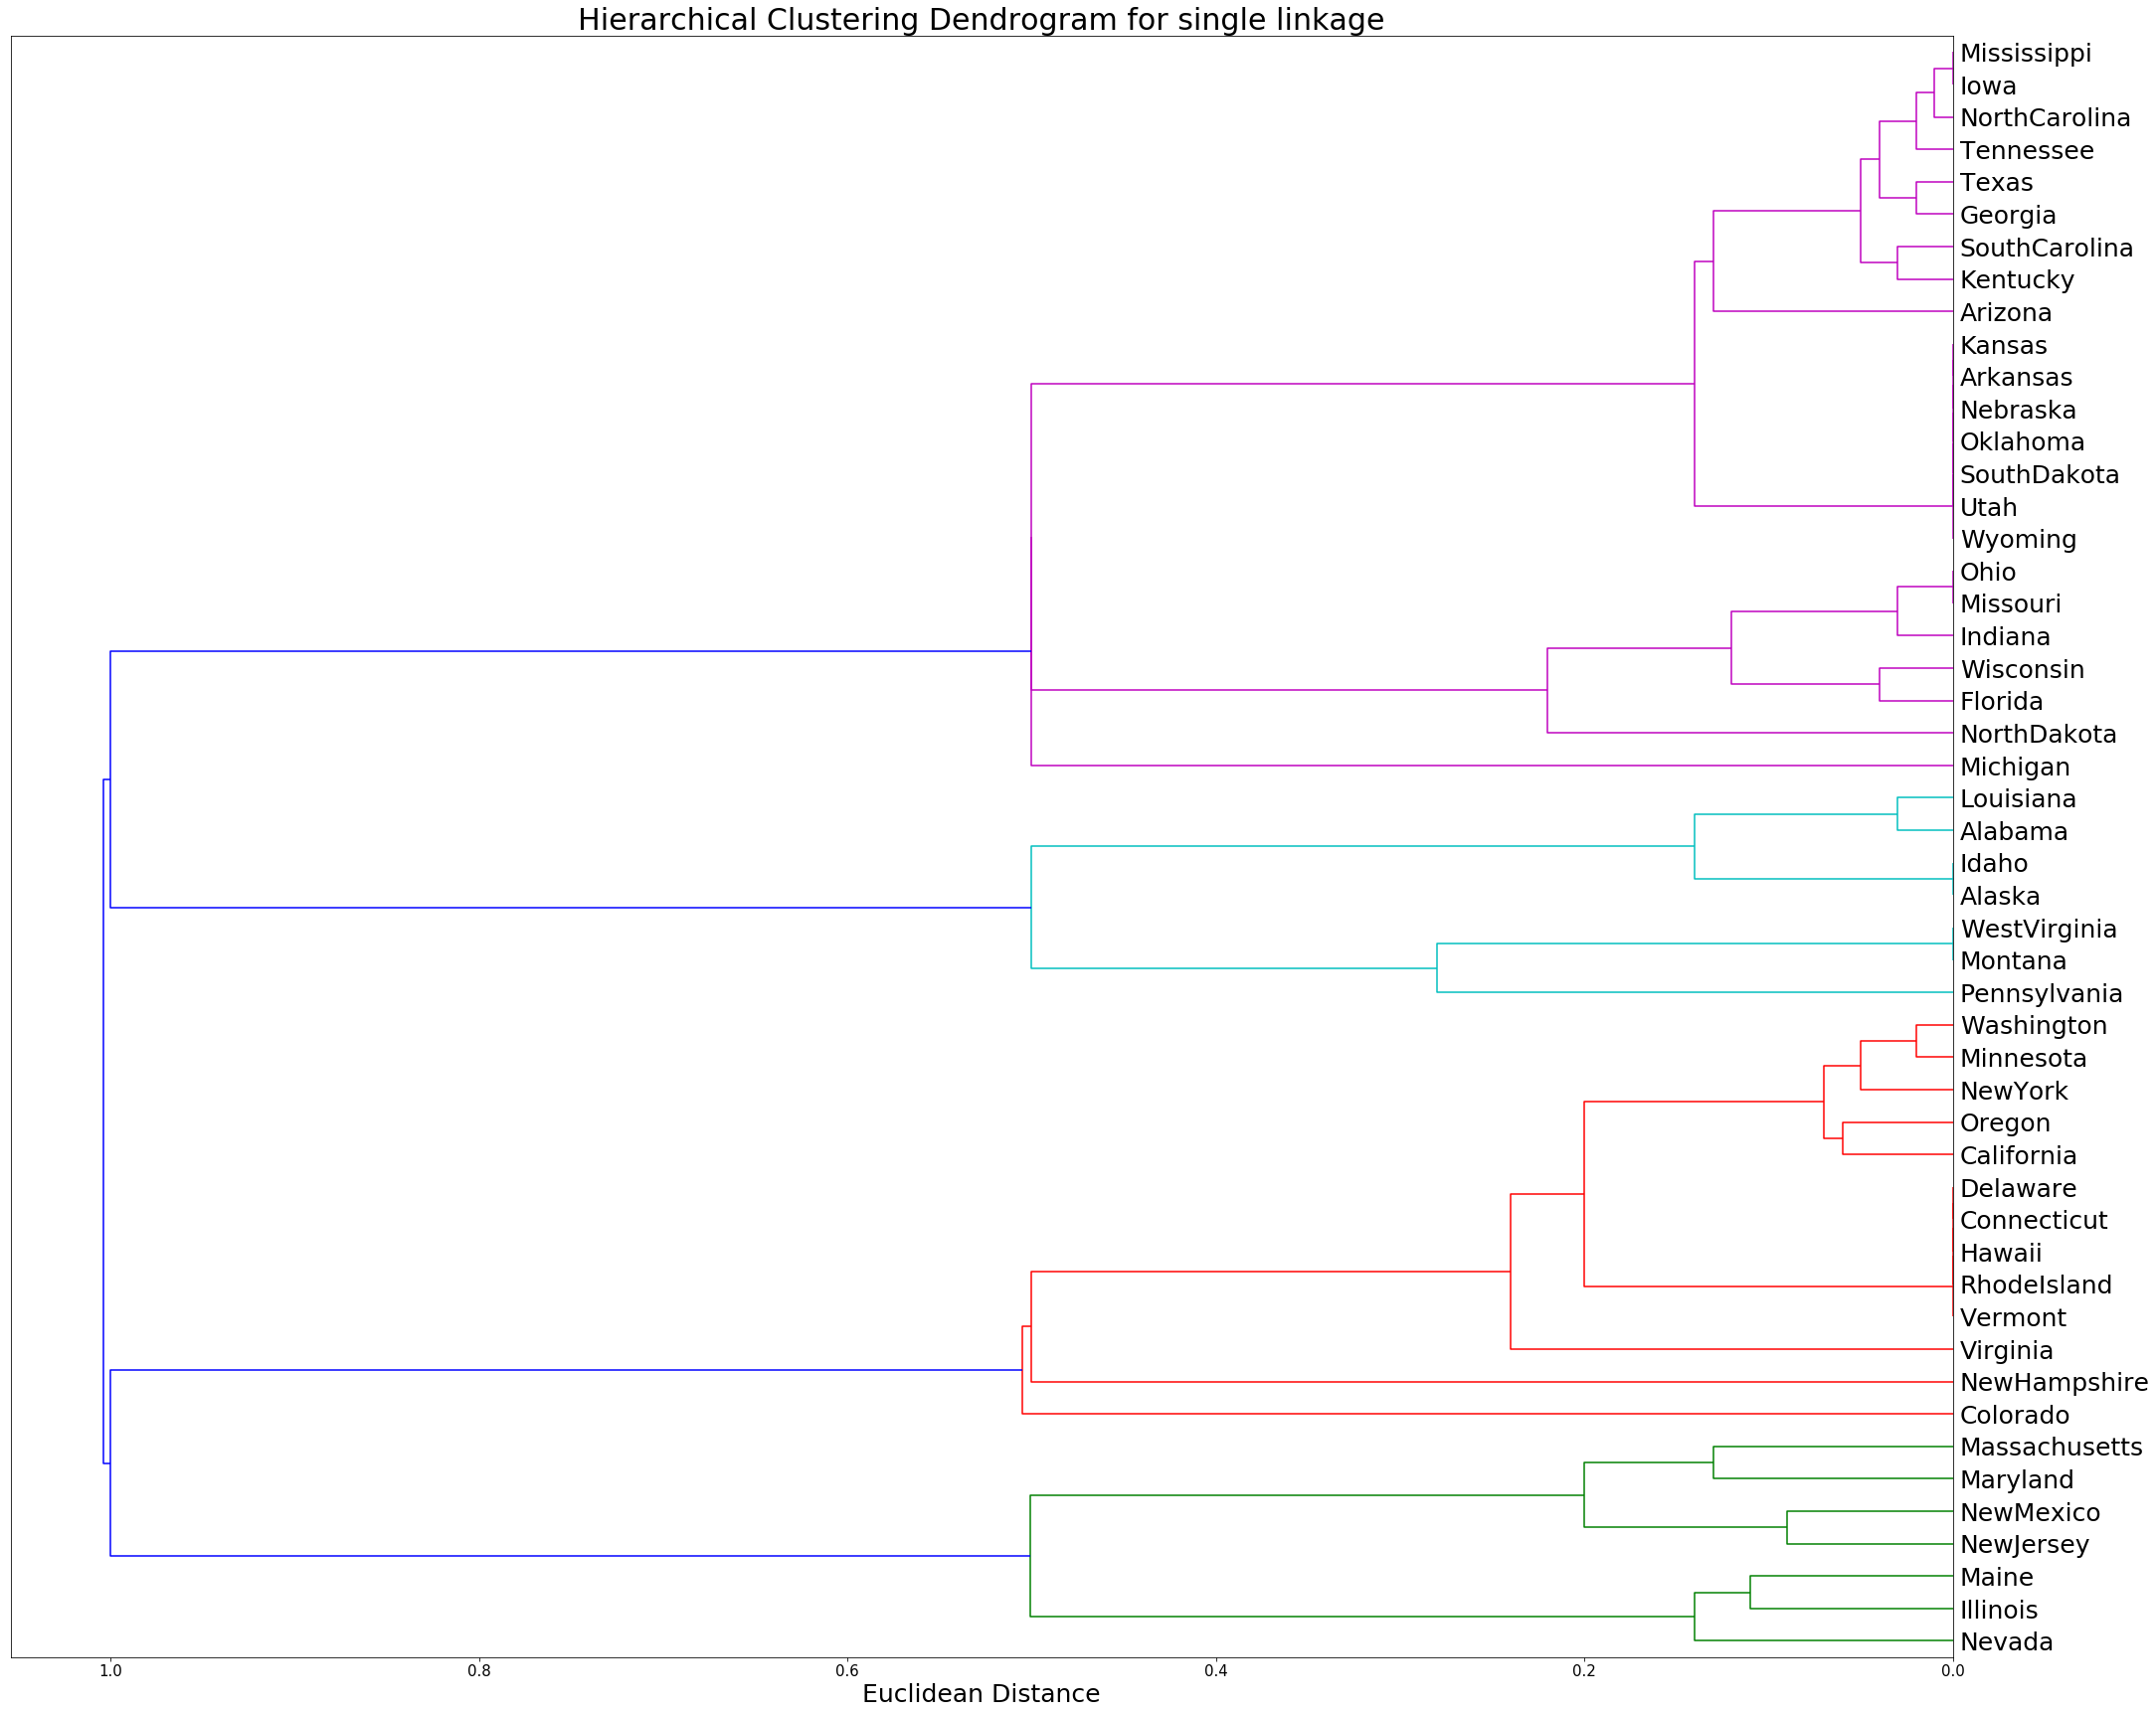

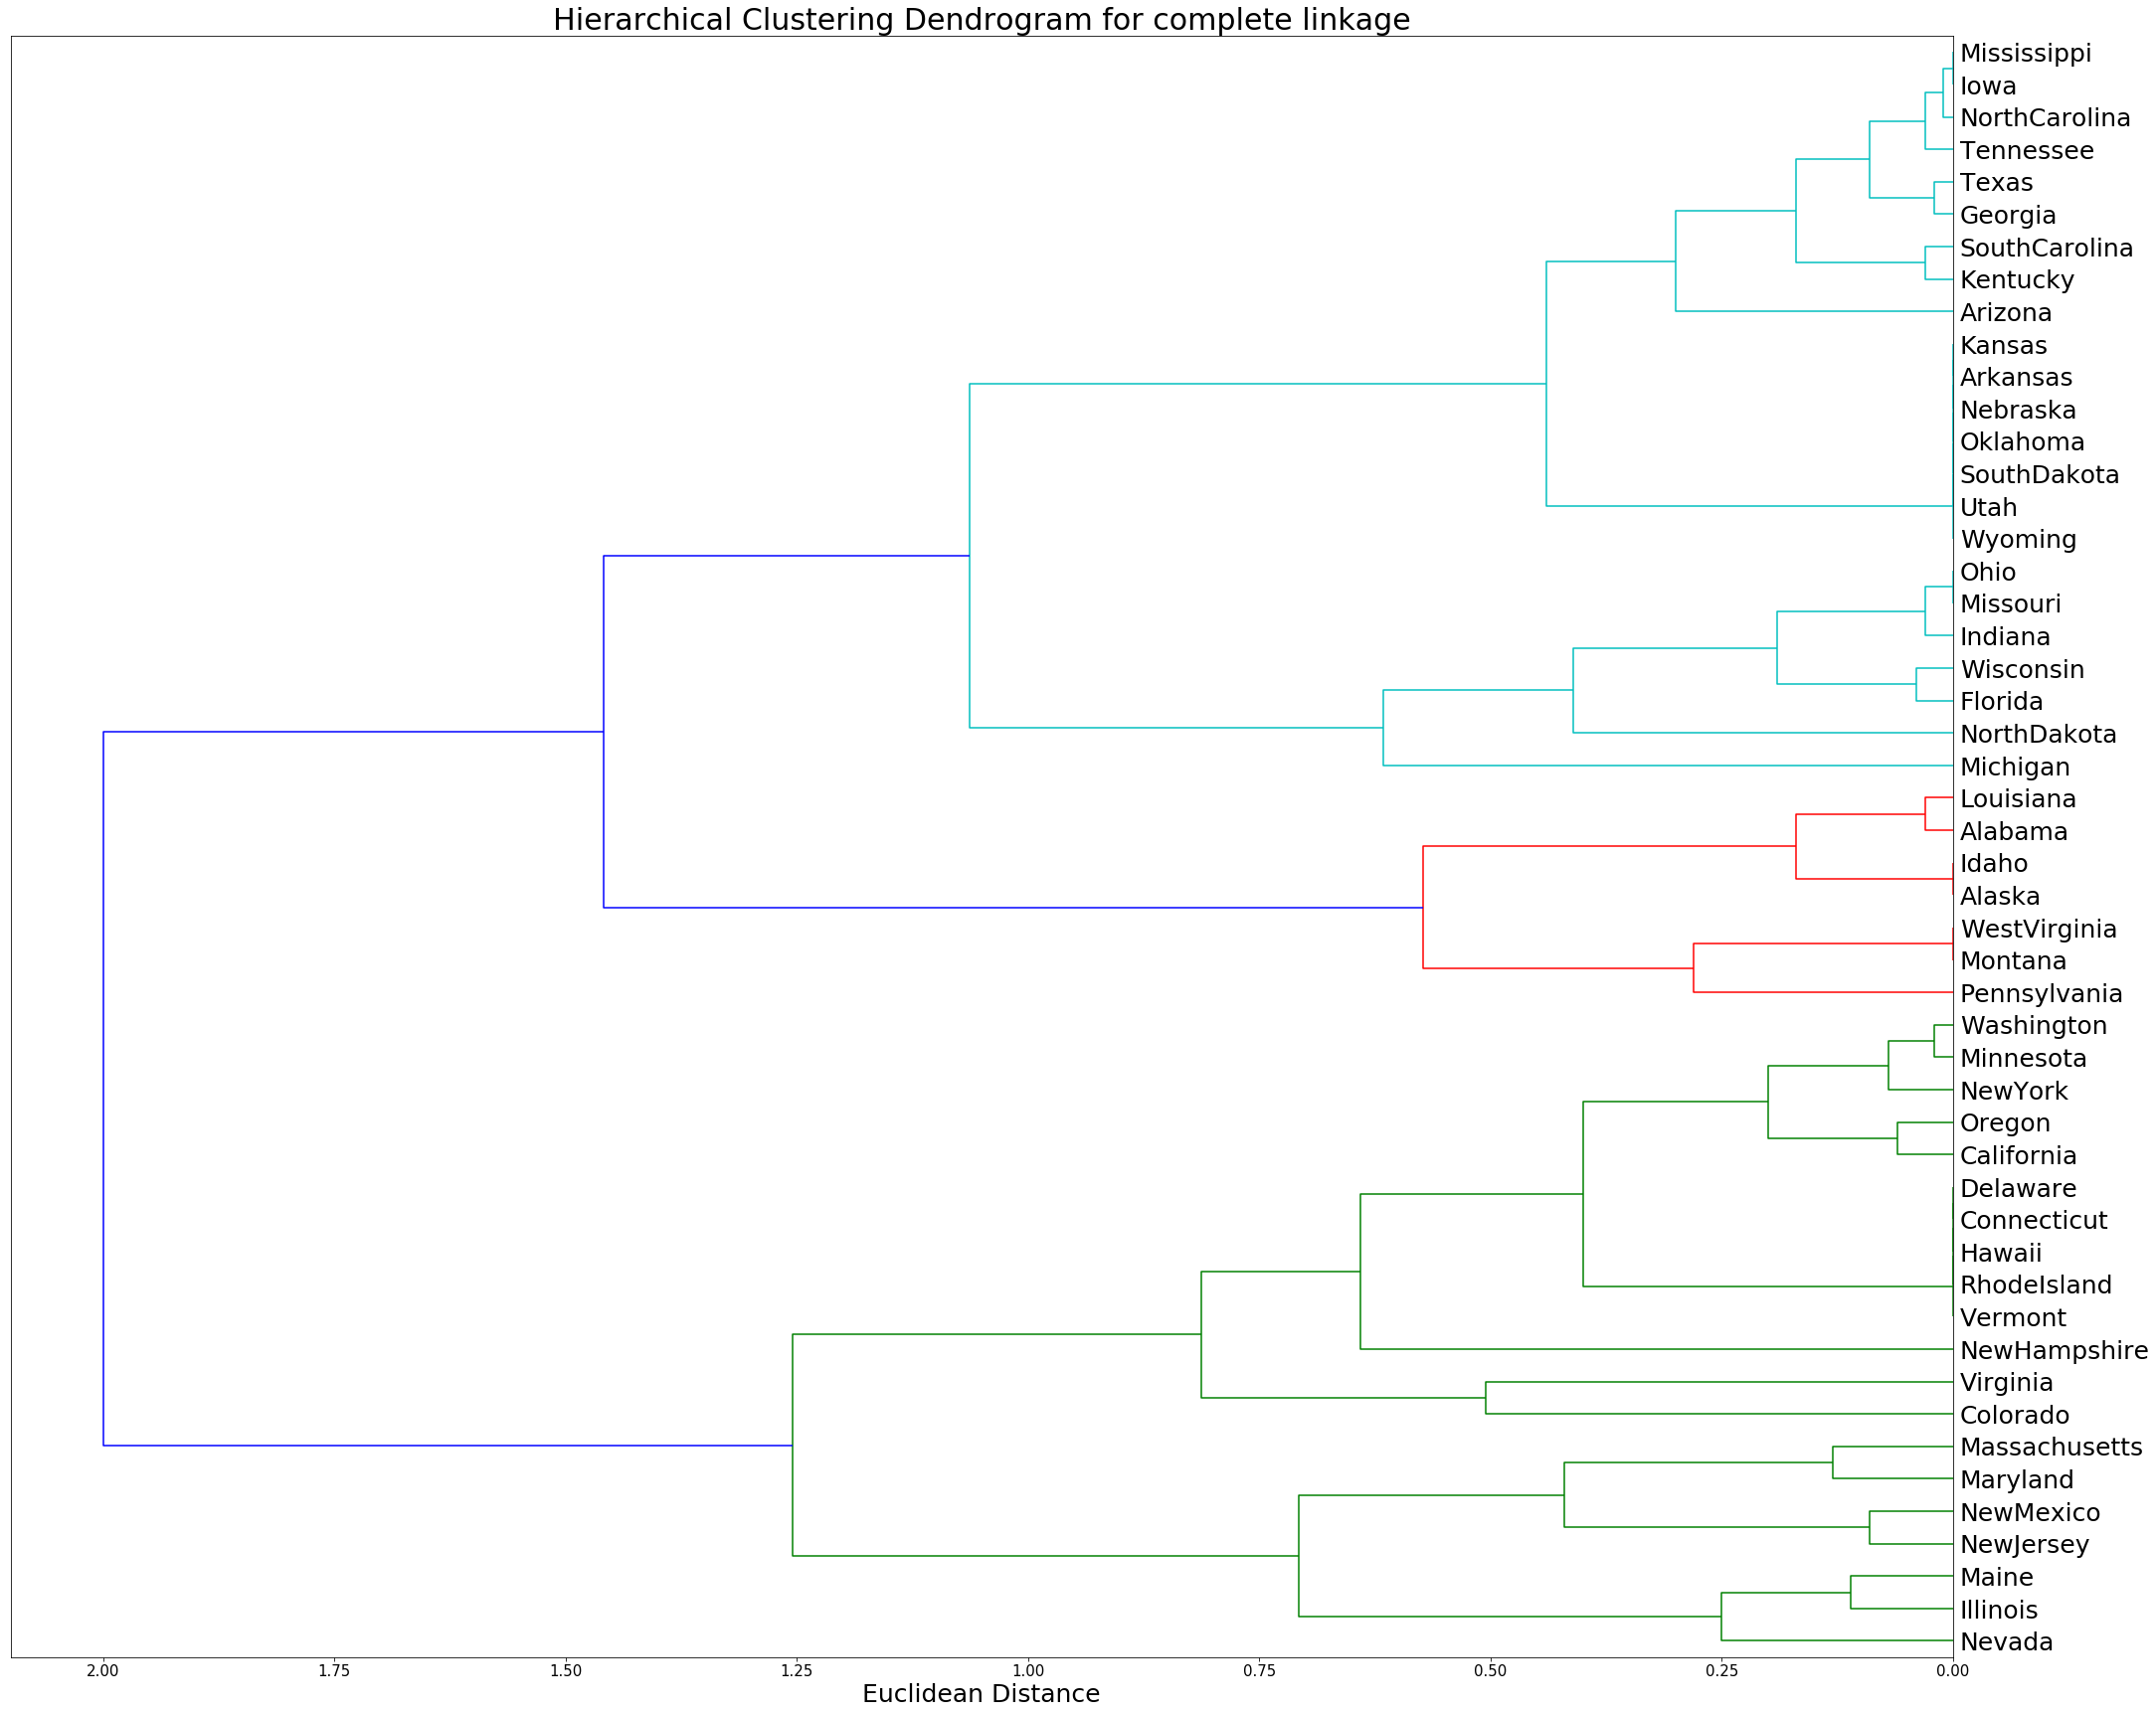

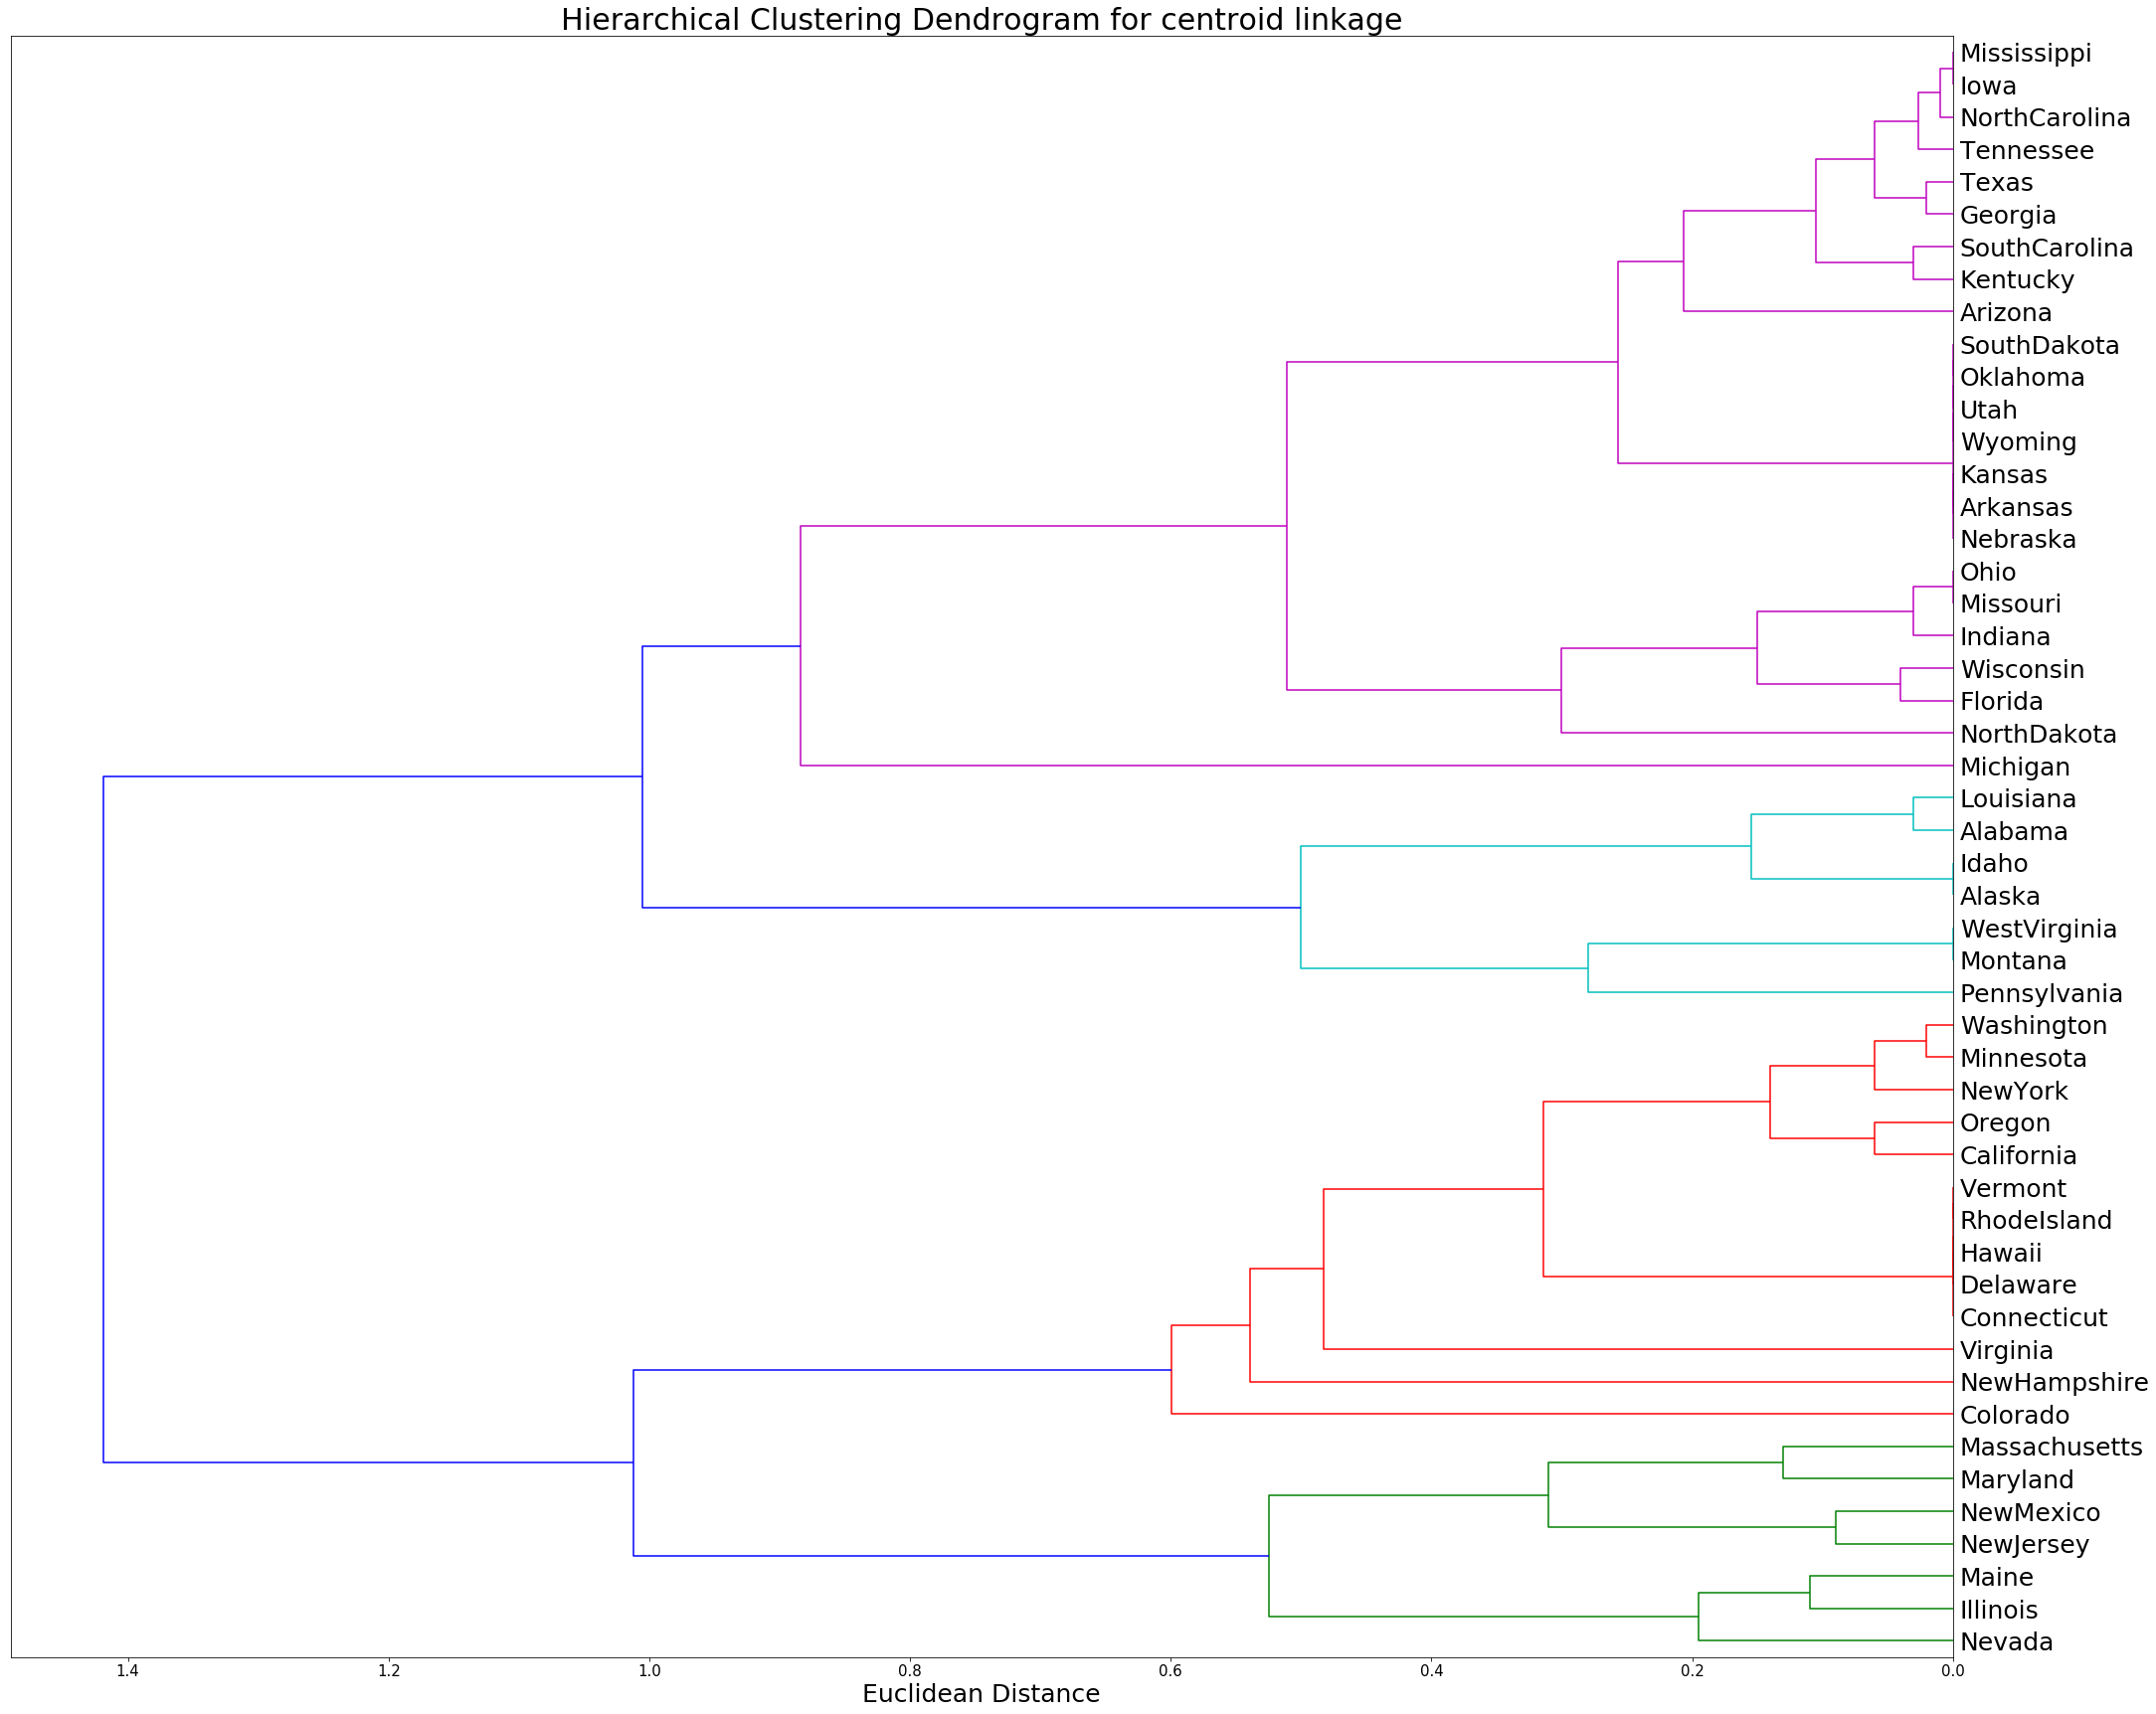

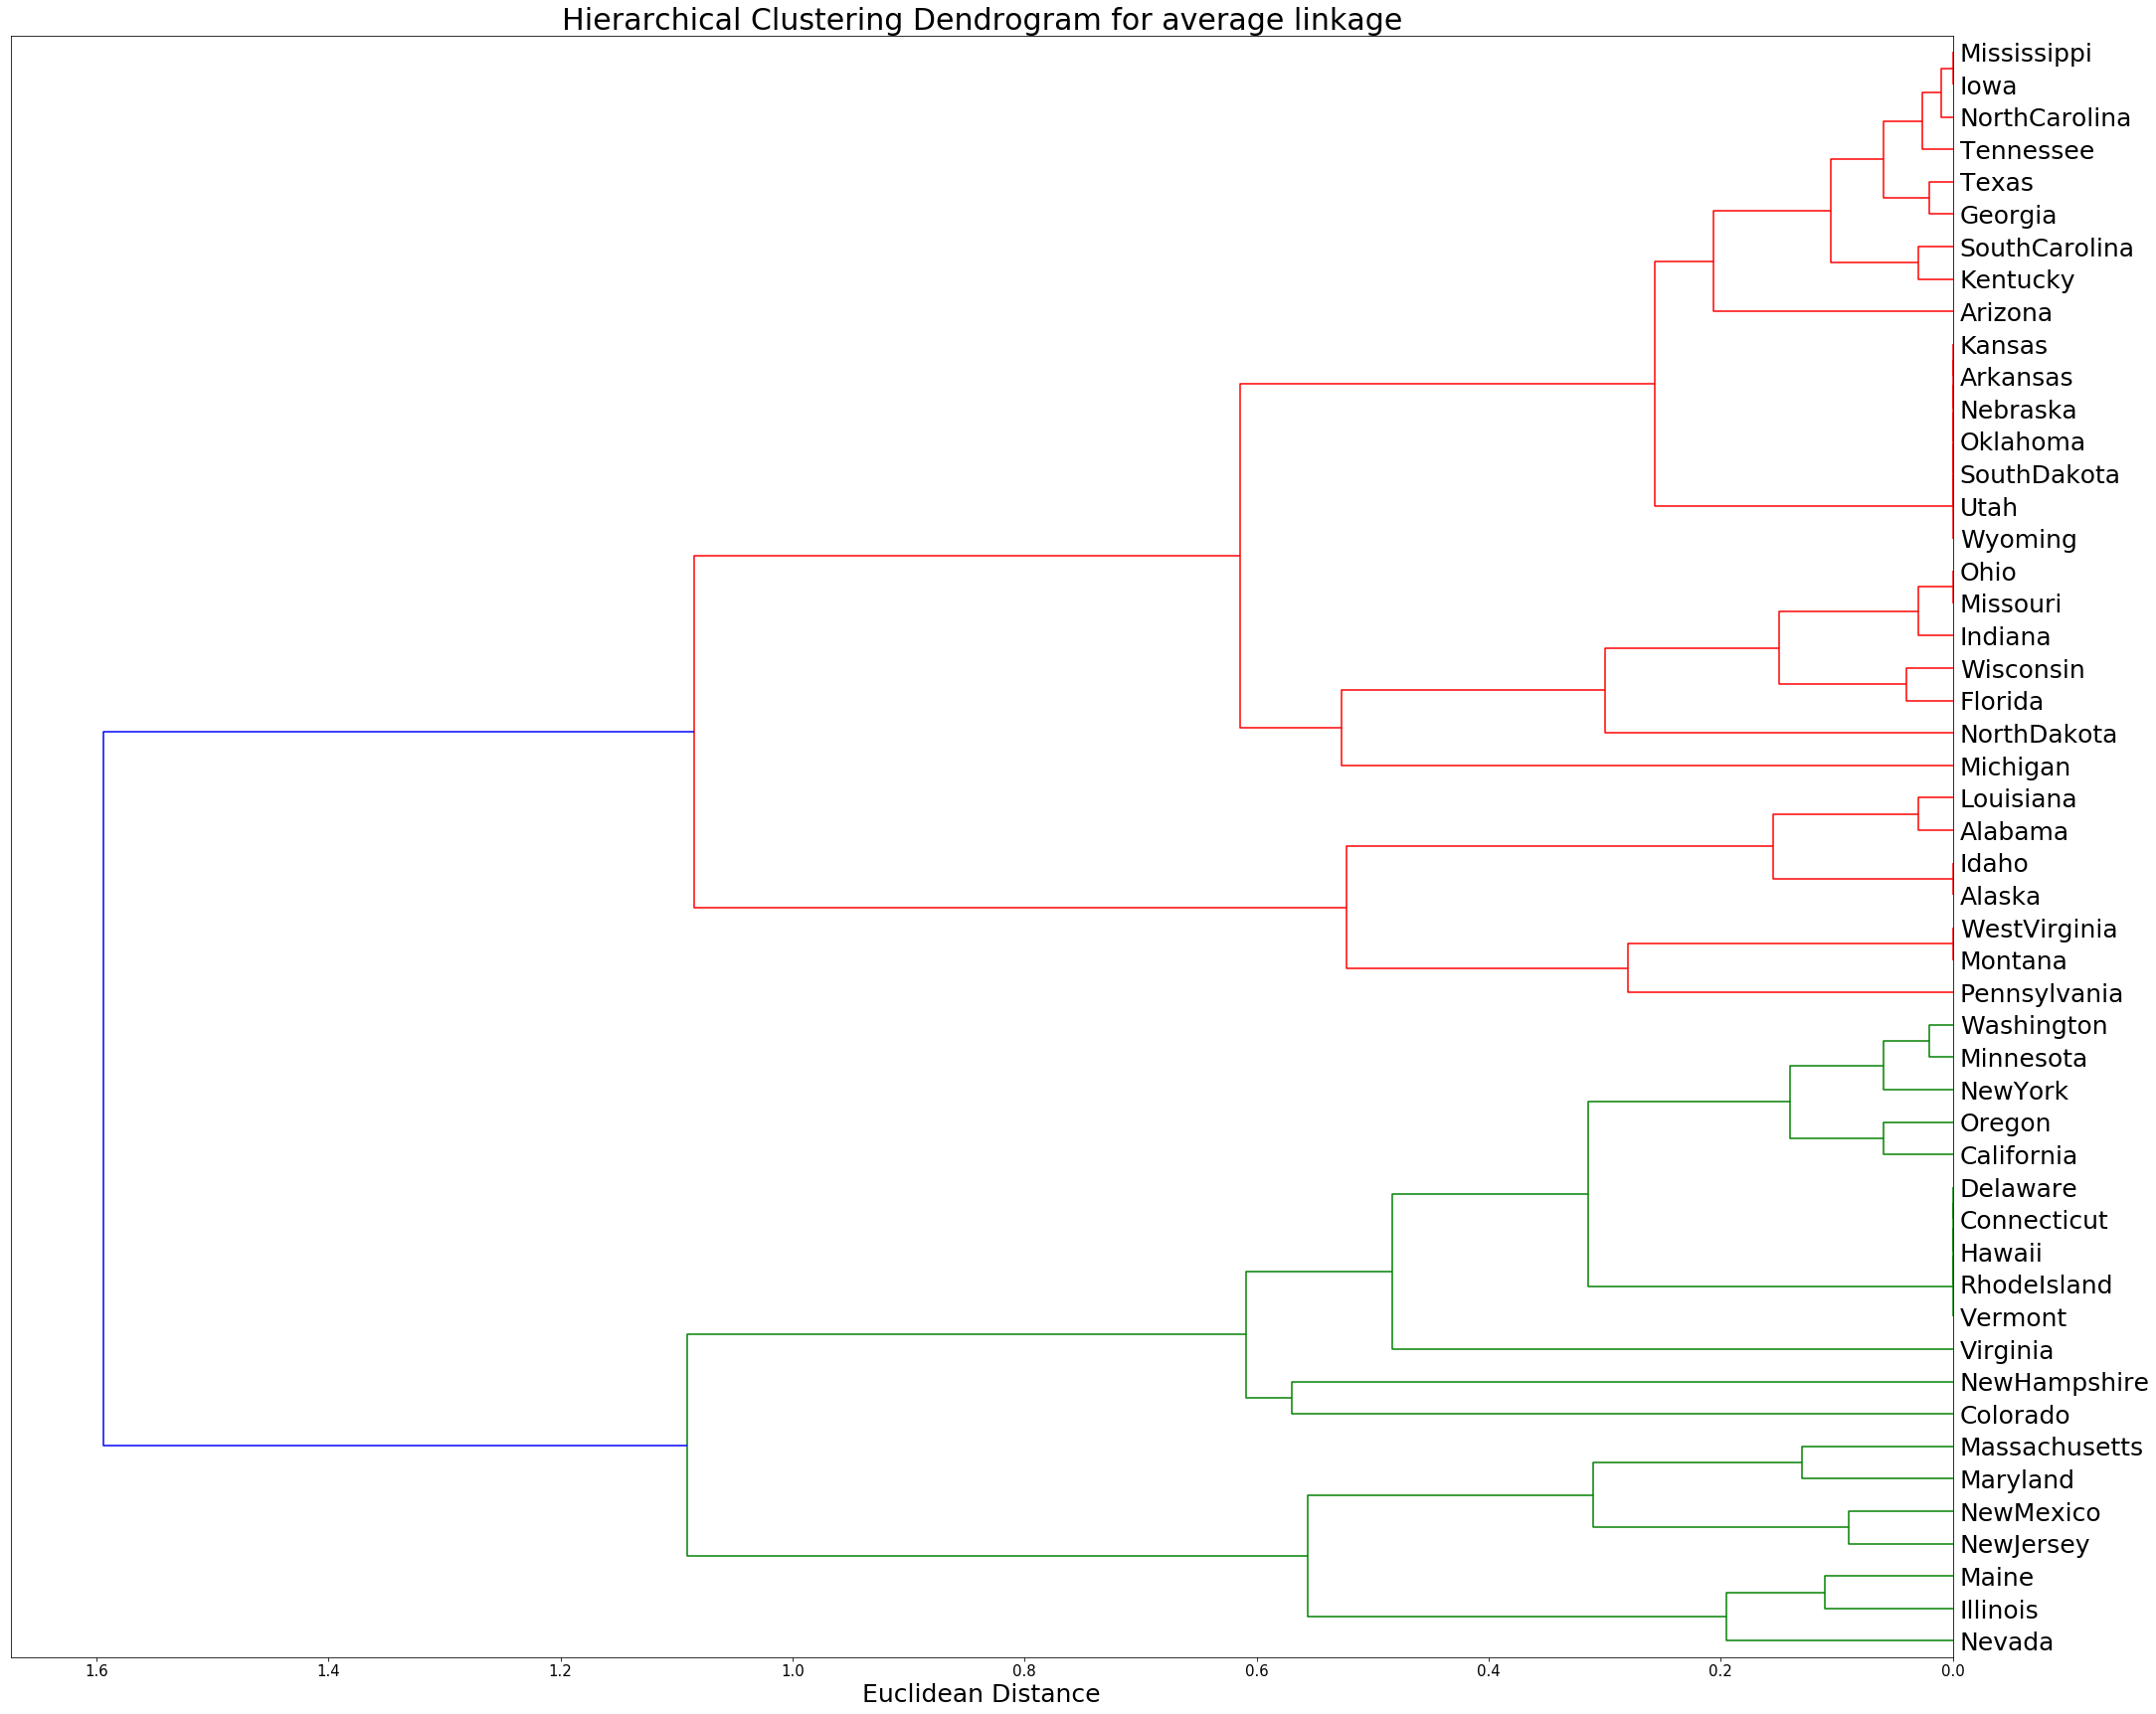

In [2]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline

#create list of linked methods 
lst = ['single', 'complete', 'centroid', 'average']

#iterate through each element in linked methods list
for i in lst:
    #create figure canvas 
    plt.figure(figsize=(35,30))
    #include title and xlabel 
    plt.title('Hierarchical Clustering Dendrogram for '+i+' linkage', fontsize=30)
    plt.xlabel('Euclidean Distance', fontsize=25)
    plt.tick_params(axis='x', labelsize=15)
    #plot dendrogram for each linkage method, statenames on the y axis
    #increasing cluster sizes go from right to left 
    dend = shc.dendrogram(shc.linkage(X, method=i, metric='euclidean'),
                          orientation='left',
                          count_sort='descendent',
                          leaf_rotation=360,
                          leaf_font_size=25,
                          labels=states)

## Conclusions

The dendrograms show that the states are clustered uniformly, thus indicating that the 50 states are split evenly between the two political parties. 

# Image Compression With K-Means

In [3]:
#import external image library 
from PIL import Image 

#function to read in the image and convert it to array
def readImage(filename):
    
    #convert image to np array 
    img = np.array(Image.open(filename))
    
    #reshape and normalize image to 2d matrix
    reshaped_img = (img / 255.0).reshape(img.shape[0] * img.shape[1], 3)   
    
    #return reshaped image 
    return reshaped_img

In [4]:
#function to calculate the closest centroids 
def closestCentroids(img, centroids):
    
    #initialize empty list to hold minimum generators 
    generator = []
    
    #for loop to dynamically create generator lists
    #for different number of clusters 
    for i in range(len(centroids)):
        generator.append([])
        
    #iterate through length of the original image 
    for i in range(len(img)):
        
        #variable iterates and stores each row of image matrix 
        vals = img[i]
        energy = 0
        
        #using list comprehension to calculate the euclidean distance from image and each centroid 
        euclid = [abs(vals[0] - centroids[j][0]) + abs(vals[1] - centroids[j][1])
                  + abs(vals[2] - centroids[j][2]) for j in range(len(centroids))]

        energy = energy + min(euclid)
        
        #add min euclidian distance 
        generator[np.argmin(euclid)].append(vals)
        
    energies = (min(euclid))    
    
    #return min generators 
    return generator, energies

In [5]:
#function to update generators for each iteration of k means 
def updateGenerators(generator, nclusters):
    
    #empty array to hold new generators 
    new_generators = []
    
    #loop through the length of number of clusters 
    for i in range(nclusters):
        
        #append the average generator for each dimension 
        #return a vector with 3 vals 
        new_generators.append(np.average(np.array(generator[i]),axis=0))
        
    #return new generators 
    return new_generators

In [6]:
#import external modules 
import random

#function to perform k means clustering 
def kmeans(img, nclusters):
    
    energy = []
    
    #create initial generators from original image matrix 
    generator = random.sample(img.tolist(), nclusters)
    
    #define iterations 
    iterations = 10
    
    #run k means for 10 iterations 
    for i in range(iterations):
        
        #calculate closest generators  
        generator, e = closestCentroids(img, generator)
        #update new generators 
        generator = updateGenerators(generator, nclusters)
        #append energies to array to access for plots
        energy.append(generator[0][0])
        
    return generator, energy

In [7]:
#function to return image to original shape 
def replacePixel(img, generator):
    
    #initialize empty matrix the same size as 
    #the original image matrix 
    new_img = np.zeros(img.shape)
    
    #iterate fot the length of the original matrix 
    for i in range(len(img)):
        
        #variable iterates and stores each row of pixels 
        vals = img[i]
        
        #calculate euclidean distance 
        euclid = [abs(vals[0] - generator[j][0]) + abs(vals[1] - generator[j][1])
                  + abs(vals[2] - generator[j][2]) for j in range(len(generator))]

        #construct new image matrix 
        new_img[i,:]=generator[np.argmin(euclid)]
        
    #return new image 
    return new_img

In [8]:
#function to plot new image vs original image for different number of k 
def plotImages(new_image, nclusters):
    
    original_image = np.array(Image.open('mandrill.png'))

    fig, ax = plt.subplots(1, 2, figsize=(20,20))
    ax[0].imshow(new_image)
    ax[0].set_title('Compressed Image when k = ' + str(nclusters), fontsize=18)
    ax[1].imshow(original_image) 
    ax[1].set_title('Original Image', fontsize=18)
    plt.show()

In [9]:
#function to plot the energy vs iteration
def plotEnergy(energy, nclusters):
    
    iteration = np.arange(0,10)
    plt.plot(np.arange(1,11), energy)
    plt.title('Iteration vs energy when k = {}'.format(nclusters))
    plt.show()

## Image Approximation when k = 2

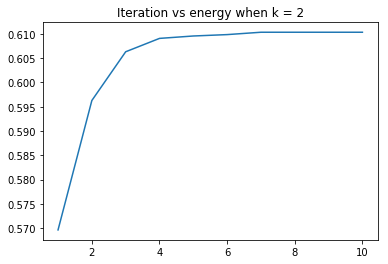

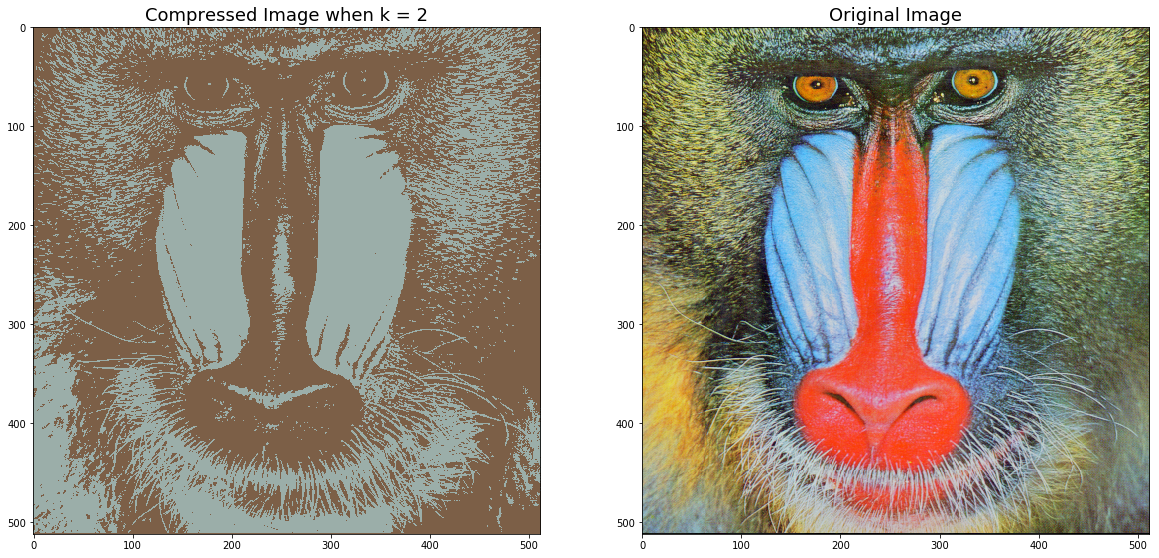

In [10]:
#read in original image 
img = readImage('mandrill.png')

#kmeans with 2 clusters 
nclusters = 2
generator_2, energy_2 = kmeans(img, nclusters)

#plot energy vs iteration
plotEnergy(energy_2, nclusters)

#reconstruct new image
new_img = replacePixel(img, generator_2)
#reshape
new_img=np.reshape(new_img, (512,512,3))
#plot compared images 
plotImages(new_img, 2)

## Image Approximation when k = 4

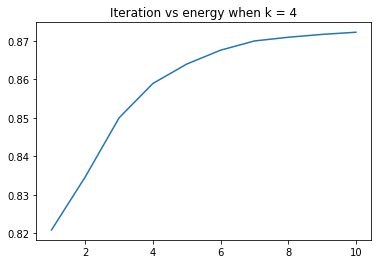

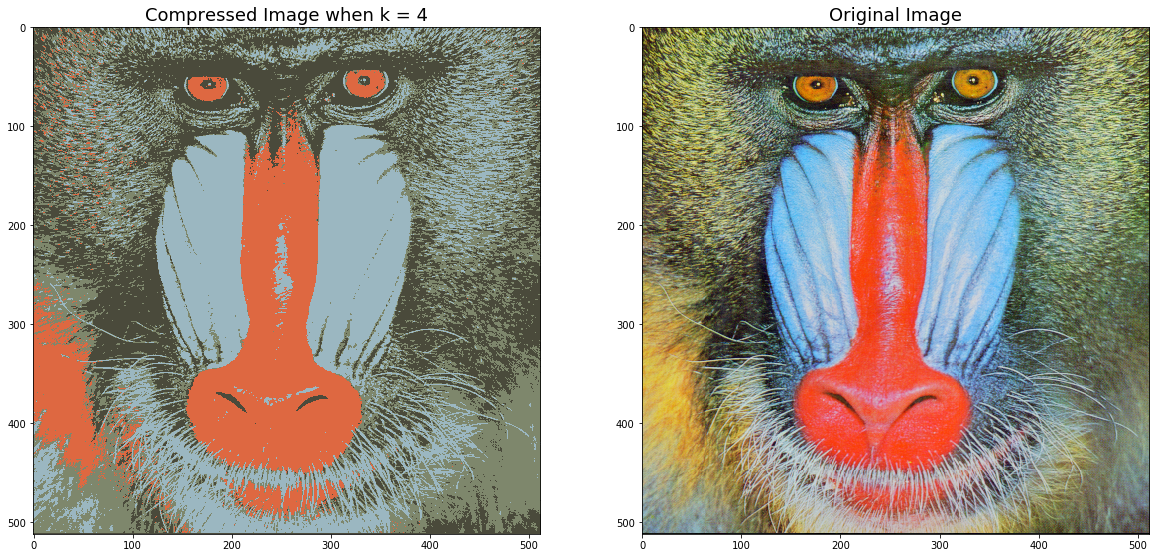

In [11]:
#kmeans with 4 clusters 
nclusters = 4
generator_4, energy_4 = kmeans(img, nclusters)

#plot energy vs iteration 
plotEnergy(energy_4, nclusters)

#reconstruct new image 
new_img = replacePixel(img, generator_4)
#reshape
new_img=np.reshape(new_img, (512,512,3))
#plot compared images
plotImages(new_img, nclusters)

## Image Approximation when k = 8

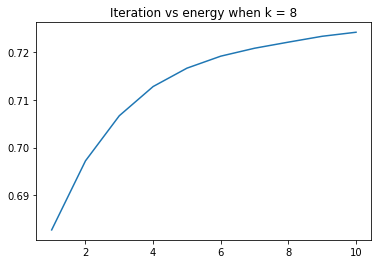

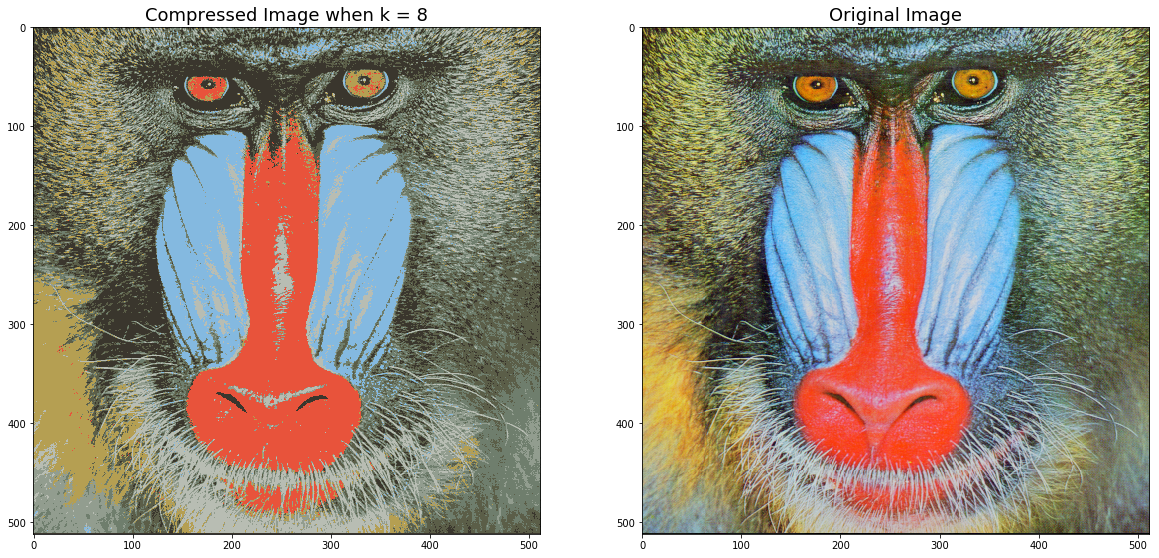

In [12]:
#kmeans for 8 clusteres 
nclusters = 8
generator_8, energy_8 = kmeans(img, 8)

#plot energy vs iteration 
plotEnergy(energy_8, nclusters)

#reconstruct compressed image 
new_img = replacePixel(img, generator_8)
#reshape 
new_img=np.reshape(new_img, (512,512,3))
#plot compared image 
plotImages(new_img, nclusters)

## Conclusions

As the number of clusters increase the more color is indroduced into the compressed image. When k = 2, the compressed image has the least amount of original RGB values represented, while k = 8 has the most color and looks similar to the original image. The energy vs iteration plot shows the direction of clustering. If the graph is increasing, the data is moving in a positive direction towards the generators. If the graph is decreasing, the data is moving in a negative direction towards the generators. Depending if the algorithm converged quickly, the energy will plateau at a certain point.